In [1]:
import os
os.chdir('..')
import graphs
import ep_utils
from time import perf_counter as pc
import networkx as nx
from collections import Counter
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import profile
import pstats

# Creating Bertha here because there's an error with creation sometimes

In [2]:
G = graphs.GenBertha()

TypeError: GenBertha() missing 1 required positional argument: 'size'

In [3]:

#sizes = list(set([int(2**i) for i in np.linspace(1,14,100)]))
sizes = 2**np.arange(5,13)
prog = tqdm(sizes,total = len(sizes))
berthas = {}

for i in prog:
    
    try:
        G = graphs.GenBertha(i)
        berthas[i] = G
    except:
        print(f"failed for size {i}")
    prog.update()

100%|█████████████████████████████████████████████| 8/8 [00:14<00:00,  1.77s/it]


In [4]:
def DuelOfMethods(bertha):
    """compares networkx's normal eigenvalue catching method to our method
    PARAMETERS:
        size (int): how big of graph you want to compare with
    RETURNS:
        our_time (float): how long our method took
        their_time (float): how long their method took
        accurate (bool): if we matched their spectrum
    """
    # normal method
    start = pc()
    their_spec = nx.adjacency_spectrum(bertha)
    end = pc()
    their_time = end-start
    
    # our method
    start = pc()
    our_spec = ep_utils.GetSpectrumFromLEPs(bertha)
    end = pc()
    our_time = end-start

    
    # check if our spectrums are the same
    accurate = Counter(np.round(np.array(their_spec),2)) == Counter(np.round(our_spec,2))
    
    return our_time, their_time, accurate
    

In [18]:
#size_list = list(set([int(2**i) for i in np.linspace(1,14,100)]))#[2**i for i in range(3,13)]

our_times = []
their_times = []
acc_count = []

progress_bar = tqdm(sizes,total=len(sizes))

for size in progress_bar:
    print(size)
    us, them, peter, acc = 0, 0, 0, 0
    iters = 4
    for i in range(iters):
        us_i, them_i, acc_i = DuelOfMethods(berthas[size])
        us, them, acc = us+us_i, them+them_i, acc+acc_i
    us, them, acc = us/iters, them/iters, acc/iters
    our_times.append(us)
    their_times.append(them)
    acc_count.append(acc)
    progress_bar.update()

 25%|███████████▎                                 | 2/8 [00:00<00:00, 10.74it/s]

32
0 out of 7
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum
0 out of 7
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum
0 out of 7
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum
0 out of 7
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum
64
0 out of 12
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum
0 out of 12
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum
0 out of 12
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum
0 out of 12
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum
128
0 out of 18
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum
0 out of 18
now getting total divisor spectrum
creating counter
sub

 62%|████████████████████████████▏                | 5/8 [00:00<00:00,  7.32it/s]

creating counter
subtracting counter
returning spectrum
0 out of 18
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum
256
0 out of 29
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum
0 out of 29
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum
0 out of 29
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum


 88%|███████████████████████████████████████▍     | 7/8 [00:01<00:00,  3.47it/s]

0 out of 29
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum
512
0 out of 45
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum
0 out of 45
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum
0 out of 45
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum


100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.13it/s]

0 out of 45
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum
1024
0 out of 70
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum
0 out of 70
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum
0 out of 70
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum


9it [00:15,  3.34s/it]                                                          

0 out of 70
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum
2048
0 out of 108
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum
0 out of 108
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum
0 out of 108
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum


11it [01:10, 13.12s/it]

0 out of 108
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum
4096
0 out of 168
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum
0 out of 168
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum
0 out of 168
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum
0 out of 168


100%|█████████████████████████████████████████████| 8/8 [05:42<00:00, 42.78s/it]

now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum


In [10]:
# integer power polynomial interpolation
z = np.polyfit(size_list,our_times,2)
p = np.poly1d(z)
z1 = np.polyfit(size_list,their_times,3)
p1 = np.poly1d(z1)

In [14]:
# mean coefficient interpolation for float power of polynomials
size = np.array(size_list)
our = np.array(our_times).reshape(-1,1)
their = np.array(their_times).reshape(-1,1)
coefs = np.linspace(1e-6,1e-3,1000)   # possible beta coefficients

# place to store the results
choices = []

# minimize the 
for power in np.linspace(1,3,25):
    betas = np.sum((np.outer(size**power,coefs)-our)**2,axis=0)
    choices.append([coefs[np.argmin(betas)],np.min(betas),power])   # store coef, and error of polynomial regression of specific power 



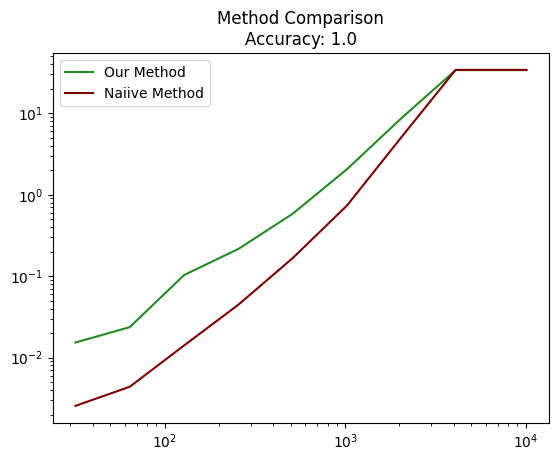

In [19]:
piece = 100
plt.loglog(list(sizes) + [10100],our_times + [us],'-',color='forestgreen',label="Our Method")
plt.loglog(list(sizes) + [10100],their_times + [them],'-',color='maroon',label='Naiive Method')
#plt.loglog(sizes,p(size_list),'-',color='midnightblue',label='Polynomial Regression (squared)')
#plt.loglog(sizes,p1(size_list),'-',color='chartreuse',label='Their Polynomial Regression (cubed)')

plt.title(f"Method Comparison\nAccuracy: {np.sum(acc_count)/len(acc_count)}")
plt.legend()
plt.show()
#plt.save('Speed_comp.png')

In [ ]:
#bertha = graphs.GenBertha(1000)
#profile.run("ep_utils.GetSpectrumFromLEPs(bertha)")

In [ ]:
# do a dot bar graph for how fast we can go 

In [10]:
from collections import Counter
import numpy as np
from time import perf_counter as pc
from matplotlib import pyplot as plt

In [29]:
arrs = []
sizes = [i for i in range(10000,1000000,1000)]

for i in sizes:
    arrs.append(np.random.randint(0,10,i))
                

In [25]:
times = []

for arr in arrs:
    start = pc()
    Counter(arr)
    end = pc()
    
    times.append(end-start)

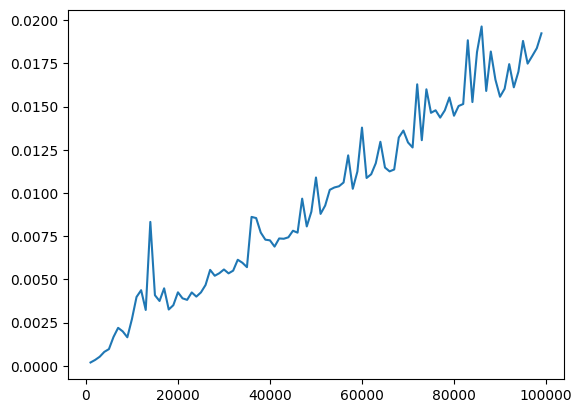

In [26]:
plt.plot(sizes,times)

In [30]:
times2 = []

obj = Counter(list(arrs[-1]))
for i in sizes[::-1]:
    start = pc()
    obj.subtract(list(arrs[-1][::i]))
    end = pc()
    
    times2.append(end-start)

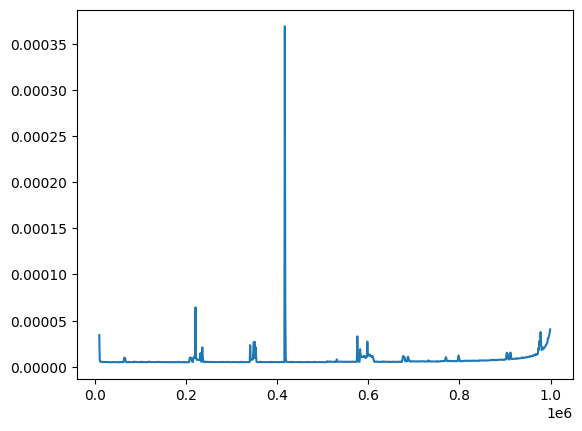

In [31]:
plt.plot(sizes,times2)